In [8]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: white;
}
</style>

In [1]:
# </path/to>/build/bin/hipace <input>

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics
from scipy import constants

from matplotlib import patches
from matplotlib import ticker

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import ConnectionPatch

import sys
sys.path.append('/Users/max/HiPACE/src/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.style.use('classic')

In [2]:
ts = LpaDiagnostics('/Users/max/HiPACE/recovery/diags/hdf5/recovery/', check_all_files = True)

In [116]:
EzDrive, infoD = ts.get_field(field = 'Ez_driver_diag', iteration = 0)
EzWitness, infoW = ts.get_field(field = 'Ez_witness_diag', iteration = 0)

EzD = np.array([np.mean(EzDrive[i,:,:]) for i in range(EzDrive.shape[0])]) # average Ez for each z-slice
EzW = np.array([np.mean(EzWitness[i,:,:]) for i in range(EzWitness.shape[0])]) # average Ez for each z-slice

driveInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_drive.0000.txt')
witnessInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_witness.0000.txt')
witness2Insitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_witness2.0000.txt')

z = diag.z_axis(driveInsitu)

maskD = np.logical_and(z >= infoD.zmin, z <= infoD.zmax)
maskW = np.logical_and(z >= infoW.zmin, z <= infoW.zmax)

Qd_slices = diag.per_slice_charge(driveInsitu)[0][maskD]
Qw_slices = (diag.per_slice_charge(witnessInsitu)[0] + diag.per_slice_charge(witness2Insitu)[0])[maskW]

# print(Qd_slices.shape, Qw_slices.shape)
# print(EzD.shape, EzW.shape)

d = EzD @ Qd_slices
w = EzW @ Qw_slices

eta = - (w / d) * 1e2 # percent

print(eta)

3.287234700363209


In [89]:
print(EzDrive.shape, EzWitness.shape)
print(EzD.shape, EzW.shape)

(154, 9, 9) (65, 5, 5)
(154,) (65,)


In [108]:
z = diag.z_axis(driveInsitu)

print(infoD.zmin, infoD.zmax)
print(z[np.logical_and(z >= infoD.zmin, z <= infoD.zmax)].shape)
print(z[np.logical_and(z >= infoW.zmin, z <= infoW.zmax)].shape)


-5.9921875 5.9609375
(154,)
(65,)


In [3]:
driveInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_drive.0000.txt')
witnessInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_witness.0000.txt')
witness2Insitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_witness2.0000.txt')
recoveryInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_recovery.0000.txt')
electronInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_electrons.0000.txt')
print("Available drive diagnostics:", driveInsitu.dtype.names)
print("Available electron diagnostics:", electronInsitu.dtype.names)
print(driveInsitu['normalized_density_factor'][0])
n0 = driveInsitu['normalized_density_factor'][0]
print(driveInsitu['total']['sum(w)'][0])

ne = 1e23 # m^-3
wp = np.sqrt((ne * constants.e**2) / (constants.epsilon_0 * constants.m_e))
# wp = np.sqrt((4 * constants.pi * ne * constants.e**2) / (constants.m_e))
kp_inv = wp / constants.c

qConst = constants.c**3 * constants.epsilon_0**(3/2) * constants.m_e**(3/2) / (np.sqrt(ne) * constants.e**2)

# print(ts.get_charge(iteration = 0, species = 'drive') * n0 * qConst)
print(diag.total_charge(driveInsitu)[0] * qConst)
print((diag.total_charge(witnessInsitu)[0] + diag.total_charge(witness2Insitu)[0]) * qConst)
print(diag.total_charge(recoveryInsitu)[0] * qConst)

# print(diag.per_slice_charge(driveInsitu)[0])
# print((2 * constants.pi)**(3/2) * 800 * (0.05 * 0.05 * 1.41))
# print((2 * constants.pi)**(3/2) * 800 * ne * kp_inv * (0.05 * 0.05 * 1.41))
# print(diag.total_charge(driveInsitu), diag.total_charge(recoveryInsitu) * 2)

# print(driveInsitu['is_normalized_units'])
# print(diag.total_charge(driveInsitu))
# print([driveInsitu[key] for key in ['z_lo', 'z_hi']])

# n0 = driveInsitu['normalized_density_factor'][0]

Available drive diagnostics: ('time', 'step', 'n_slices', 'charge', 'mass', 'z_lo', 'z_hi', 'normalized_density_factor', 'is_normalized_units', '[x]', '[x^2]', '[y]', '[y^2]', '[z]', '[z^2]', '[ux]', '[ux^2]', '[uy]', '[uy^2]', '[uz]', '[uz^2]', '[x*ux]', '[y*uy]', '[z*uz]', '[ga]', '[ga^2]', 'sum(w)', 'Np', 'average', 'total')
Available electron diagnostics: ('time', 'step', 'n_slices', 'charge', 'mass', 'z_lo', 'z_hi', 'normalized_density_factor', 'is_normalized_units', '[x]', '[x^2]', '[y]', '[y^2]', '[ux]', '[ux^2]', '[uy]', '[uy^2]', '[uz]', '[uz^2]', '[ga]', '[ga^2]', 'sum(w)', 'Np', 'average', 'total')
0.0003063713757223662
144966.9450568161
-3.3768757648769785e-09
1.3990346877590807e-10
-1.6884446362168094e-09


In [15]:
Qd_slices = diag.per_slice_charge(driveInsitu)[0]
Qw_slices = diag.per_slice_charge(witnessInsitu)[0] + diag.per_slice_charge(witness2Insitu)[0]

print(Qd_slices.shape, Qw_slices.shape)

(512,) (512,)


In [6]:
driveInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_drive.0000.txt')
witnessInsitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_witness.0000.txt')
witness2Insitu = diag.read_file('/Users/max/HiPACE/recovery/diags/insitu/eff/reduced_witness2.0000.txt')

print("Available drive diagnostics:", driveInsitu.dtype.names)


Available drive diagnostics: ('time', 'step', 'n_slices', 'charge', 'mass', 'z_lo', 'z_hi', 'normalized_density_factor', 'is_normalized_units', '[x]', '[x^2]', '[y]', '[y^2]', '[z]', '[z^2]', '[ux]', '[ux^2]', '[uy]', '[uy^2]', '[uz]', '[uz^2]', '[x*ux]', '[y*uy]', '[z*uz]', '[ga]', '[ga^2]', 'sum(w)', 'Np', 'average', 'total')


In [5]:
print(ts.avail_species)
print(ts.avail_fields)

['drive', 'recovery', 'witness', 'witness2']
['Bx', 'By', 'Bz', 'ExmBy', 'EypBx', 'Ez', 'Psi', 'Sx', 'Sy', 'chi', 'jx', 'jx_beam', 'jy', 'jy_beam', 'jz_beam', 'rho', 'rhomjz']


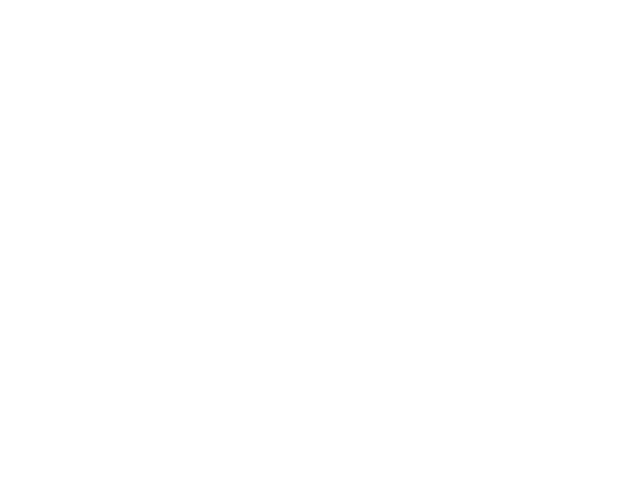

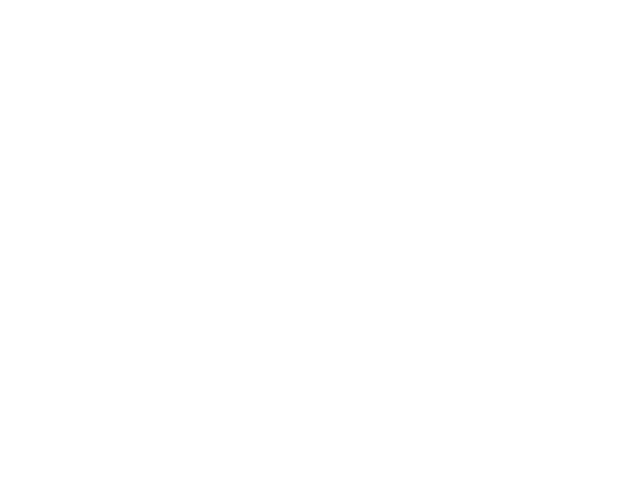

In [5]:
ts.slider(cmap = 'RdBu')

In [3]:
def get_Ez(E, info):
    return np.transpose(E)[len(info.x)//2, :][len(info.x)//2]

def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def gaussianA(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def Edensity(iteration = 0, xyz = False):

    i = iteration

    Ez, info = ts.get_field(field = 'Ez', iteration = i)
    ExmBy, _ = ts.get_field(field = 'ExmBy', iteration = i)
    EypBx, _ = ts.get_field(field = 'EypBx', iteration = i)
    By, _ = ts.get_field(field = 'By', iteration = i)
    Bx, _ = ts.get_field(field = 'Bx', iteration = i)
    Bz, _ = ts.get_field(field = 'Bz', iteration = i)
    # xd, zd = ts.get_particle(species = 'drive', iteration = i, var_list = ['x', 'z'])
    # xw, zw = ts.get_particle(species = 'witness', iteration = i, var_list = ['x', 'z'])
    # xw2, zw2 = ts.get_particle(species = 'witness2', iteration = i, var_list = ['x', 'z'])

    

    Ex = ExmBy + By
    Ey = EypBx - Bx

    # epsilon_0 = 1 / (c^2 mu_0)
    
    # u = 1 / 2 * (constants.epsilon_0 * (Ex**2 + Ey**2 + Ez**2) + 1 / constants.mu_0 * (Bx**2 + By**2 + Bz**2))
    u = 1 / 2 * (1 / constants.c**2 * (Ex**2 + Ey**2 + Ez**2) + (Bx**2 + By**2 + Bz**2))
    
    if xyz:
        return u, info
    else:
        return u

def charge(q: float, ne = 1e23) -> float:
    """
    Calculates charge in Coulombs based off of normalized charge

    Parameters
    ----------
    q : float
        normalized charge
    ne : float
        plasma electron density (in m^-3).  Defaults to 1e23 m^-3

    Returns
    -------
    q0 * q : float
        charge in Coulombs
    """
    # n_b = Q/((2*pi)^(3/2)* std_x * std_y * std_z)
    
    q0 = constants.c**3 * constants.epsilon_0**(3/2) * constants.m_e**(3/2) / (np.sqrt(ne) * constants.e**2)
    
    return q0 * q

def skinDepth(ne = 1e17):
    """
    Calculates plasma skin depth based off plasma electron density

    Parameters
    ----------
    ne : float
        plasma electron density (in cm^-3).  Defaults to 1e17 cm^-3
    
    Returns
    -------
    kp_inv : float
        plasma skin depth in µm
    """

    # if unit == 'SI':
    wp = 1e-3 * np.sqrt((ne * constants.e**2) / (constants.epsilon_0 * constants.m_e)) # SI
    # elif unit == 'CGS':
        # wp = np.sqrt((4 * constants.pi * ne * constants.e**2) / (constants.m_e)) # CGS
    
    kp_inv = constants.c / wp # µm
    
    return kp_inv

def efficiency(path: str, profile: dict = None, iteration = 0, plot = True, check_files = False, insitu_path: str = None) -> float:
    
    """
    Calculates energy transfer efficiency from drive to witness bunch.

    Parameters
    ----------
    path : str
        path to output directory

    profile : dict
        profile of the bunches takes on the following form (assuming the bunches are formed by gaussians)
            {'drive': [[mu1, sigma1], [mu2, sigma2], ...], 'witness': [[mu1, sigma1], [mu2, sigma2], ...]}
        If None, then a histogram of each bunch profile is used to calculate energy transfer efficiency.
    
    iteration : int, optional
        iteration number. Defaults to 0.
    
    plot : bool, optional
        plots plasma wakefield, transverse electric field (Ez), and particle beams in normalized coordinates. Defaults to True.

    check_files :bool, optional
        check all files in directory are of the same form. Defaults to False.

    insitu_path : str, optional
        path to insitu diagnostics file. Defaults to None.

    Returns
    -------
    eta : float (in percent)
        energy transfer efficiency from drive to witness bunch
    """

    ts = LpaDiagnostics(path, check_all_files = check_files)

    i = iteration

    Qd = charge(ts.get_charge(species = 'drive', iteration = i))
    Qw = charge(ts.get_charge(species = 'witness', iteration = i) + ts.get_charge(species = 'witness2', iteration = i))
    # Qr = ts.get_charge(species = 'recovery', iteration = i)

    ExmBy, _ = ts.get_field(field = 'ExmBy', iteration = i, coord = 'z')
    Ez_raw, info = ts.get_field(field = 'Ez', iteration = i, coord = 'z')
    xd, zd = ts.get_particle(species = 'drive', iteration = i, var_list = ['x', 'z'])
    xw, zw = ts.get_particle(species = 'witness', iteration = i, var_list = ['x', 'z'])
    xw2, zw2 = ts.get_particle(species = 'witness2', iteration = i, var_list = ['x', 'z'])
    xr, zr = ts.get_particle(species = 'recovery', iteration = i, var_list = ['x', 'z'])

    Ez = np.transpose(Ez_raw)[len(info.x) // 2, :][len(info.x) // 2] # on-axis slice of Ez

    driveMin, driveMax = min(zd), max(zd)
    witnessMin, witnessMax = min(zw), max(zw) # note that 'witness2' is spatially contained in 'witness'
    # witnessMin2, witnessMax2 = min(zw2), max(zw2)
    recoveryMin, recoveryMax = min(zr), max(zr)

    # driveWidth = driveMax - driveMin
    # witnessWidth = witnessMax - witnessMin

    maskD = np.logical_and(driveMin <= info.z, info.z <= driveMax)
    maskW = np.logical_and(witnessMin <= info.z, info.z <= witnessMax)
    maskR = np.logical_and(recoveryMin <= info.z, info.z <= recoveryMax)
    # maskW2 = np.logical_and(witnessMin2 <= info.z, info.z <= witnessMax2)

    if not profile:
        plt.rcParams['agg.path.chunksize'] = 10000
        profileD = plt.hist(zd, bins = len(Ez[maskD]))[0]
        profileW = plt.hist(np.concatenate((zw, zw2)), bins = (len(Ez[maskW])))[0]
        plt.close()
    else:
        profileD = np.sum([gaussian(info.z[maskD], *params) for params in profile['drive']], axis = 0)
        profileW = np.sum([gaussian(info.z[maskW], *params) for params in profile['witness']], axis = 0)
    
    EzDAvg = np.average(Ez[maskD], weights = profileD)
    EzWAvg = np.average(Ez[maskW], weights = profileW)
    

    # eta = - (Qr * EzWAvg) / (Qw * EzDAvg) * 1e2 # percent
    eta = - (Qw * EzWAvg) / (Qd * EzDAvg) * 1e2 # percent

    if plot:

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))

        im = ax.pcolormesh(info.z, info.x, np.transpose(ExmBy[:, len(info.x)//2]), cmap = 'RdBu', vmin = -2, vmax = 2)

        plt.scatter(zd, xd, s = .02, color = 'darkred')
        plt.scatter(zw, xw, s = .02, color = 'darkblue')
        plt.scatter(zw2, xw2, s = .02, color = 'darkblue', label = '__nolegend__')
        plt.scatter(zr, xr, s = .02, color = 'darkgreen')
        plt.legend(['$e^-$ Drive Bunch', '$e^+$ Witness Bunch', '$e^-$ Recovery Bunch'], loc = 'upper left', markerscale = 10)
        
        if insitu_path:
            import sys
            sys.path.append('/Users/max/HiPACE/src/hipace/tools/')
            import read_insitu_diagnostics as diag
            all_data = diag.read_file(insitu_path)

            ax.set_xlim(all_data['z_lo'], all_data['z_hi'])
        else:
            ax.set_xlim(-34, 6)
        
        ax.set_ylim(-6, 6)
        ax.set_ylabel('$k_px$')
        ax.set_xlabel('$k_p\zeta$')

        ax2 = ax.twinx()
        ax2.plot(info.z, Ez, color = 'black')
        ax2.set_ylim(-.8, .8)
        ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

        divider2 = make_axes_locatable(ax)
        cax2 = divider2.append_axes("right", size = "4%", pad = .8)
        divider3 = make_axes_locatable(ax2)
        cax3 = divider3.append_axes("right", size = "4%", pad = .8)
        cax3.remove()

        cb2 = plt.colorbar(im, cax=cax2)
        cb2.set_label(r'$(E_x - B_y)/E_0 $')
        plt.show()

    return eta

def quickEfficiency(path: str, insitu_path: str, iteration = 0, check_files = False) -> float:
    """
    Calculates energy transfer efficiency from drive to witness bunch.

    Parameters
    ----------
    path : str
        path to output directory
    
    insitu_path : str
        path to insitu diagnostics file

    iteration : int, optional
        iteration number. Defaults to 0.
    
    check_files :bool, optional
        check all files in directory are of the same form. Defaults to False.

    Returns
    -------
    eta : float (in percent)
        energy transfer efficiency from drive to witness bunch
    """
    ts = LpaDiagnostics(path, check_all_files = check_files)

    driveInsitu = diag.read_file(insitu_path + '/reduced_drive.0000.txt')
    witnessInsitu = diag.read_file(insitu_path + '/reduced_witness.0000.txt')
    witness2Insitu = diag.read_file(insitu_path + '/reduced_witness2.0000.txt')

    Qd_slices = diag.per_slice_charge(driveInsitu)[0]
    Qw_slices = diag.per_slice_charge(witnessInsitu)[0] + diag.per_slice_charge(witness2Insitu)[0]

    i = iteration

    Ez_raw, info = ts.get_field(field = 'Ez', iteration = i, coord = 'z')
    
    Ez = get_Ez(Ez_raw, info) # on-axis slice of Ez

    d = Ez @ Qd_slices
    w = Ez @ Qw_slices

    eta = - (w / d) * 1e2 # percent

    return eta

def efficiency3D(path: str, insitu_path: str, iteration = 0, check_files = False) -> float:
    """
    Calculates energy transfer efficiency from drive to witness bunch.

    NOTE: `diagnostic.names = driver_diag witness_diag` must be set with xyz Ez field diagnostics enabled in order for this to work

    Parameters
    ----------
    path : str
        path to output directory
    
    insitu_path : str
        path to insitu diagnostics file

    iteration : int, optional
        iteration number. Defaults to 0.
    
    check_files :bool, optional
        check all files in directory are of the same form. Defaults to False.

    Returns
    -------
    eta : float (in percent)
        energy transfer efficiency from drive to witness bunch
    """
    
    ts = LpaDiagnostics(path, check_all_files = check_files)
    
    i = iteration

    EzDrive, infoD = ts.get_field(field = 'Ez_driver_diag', iteration = i)
    EzWitness, infoW = ts.get_field(field = 'Ez_witness_diag', iteration = i)

    EzD = np.array([np.mean(EzDrive[i,:,:]) for i in range(EzDrive.shape[0])]) # average Ez for each z-slice
    EzW = np.array([np.mean(EzWitness[i,:,:]) for i in range(EzWitness.shape[0])]) # average Ez for each z-slice

    driveInsitu = diag.read_file(insitu_path + '/reduced_drive.0000.txt')
    witnessInsitu = diag.read_file(insitu_path + '/reduced_witness.0000.txt')
    witness2Insitu = diag.read_file(insitu_path + '/reduced_witness2.0000.txt')

    z = diag.z_axis(driveInsitu)

    maskD = np.logical_and(z >= infoD.zmin, z <= infoD.zmax)
    maskW = np.logical_and(z >= infoW.zmin, z <= infoW.zmax)

    Qd_slices = diag.per_slice_charge(driveInsitu)[0][maskD]
    Qw_slices = (diag.per_slice_charge(witnessInsitu)[0] + diag.per_slice_charge(witness2Insitu)[0])[maskW]

    # print(Qd_slices.shape, Qw_slices.shape)
    # print(EzD.shape, EzW.shape)

    d = EzD @ Qd_slices
    w = EzW @ Qw_slices

    eta = - (w / d) * 1e2 # percent

    return eta

def recovery(path: str, profile: dict = None, iteration = 0, plot = True, check_files = False, insitu_path: str = None, q = True, verbose = False) -> float:
    
    """
    Calculates energy transfer efficiency from witness to recovery bunch.

    Parameters
    ----------
    path : str
        path to output directory

    profile : dict
        profile of the bunches takes on the following form (assuming the bunches are formed by gaussians)
            {'drive': [[mu1, sigma1], [mu2, sigma2], ...], 'witness': [[mu1, sigma1], [mu2, sigma2], ...], 'recovery': [[mu1, sigma1], [mu2, sigma2], ...]}
        If None, then a histogram of each bunch profile is used to calculate energy transfer efficiency.
    
    iteration : int, optional
        iteration number. Defaults to 0.
    
    plot : bool, optional
        plots plasma wakefield, transverse electric field (Ez), and particle beams in normalized coordinates. Defaults to True.

    check_files : bool, optional
        check all files in directory are of the same form. Defaults to False.

    insitu_path : str, optional
        path to insitu diagnostics file. Defaults to None.

    Returns
    -------
    Ez_Avg : float
        Average Ez field for each bunch weighted by the bunch profile.
    """

    ts = LpaDiagnostics(path, check_all_files = check_files)

    i = iteration

    Qd = charge(ts.get_charge(species = 'drive', iteration = i))
    Qw = charge(ts.get_charge(species = 'witness', iteration = i) + ts.get_charge(species = 'witness2', iteration = i))
    Qr = charge(ts.get_charge(species = 'recovery', iteration = i))

    Ez_raw, info = ts.get_field(field = 'Ez', iteration = i, coord = 'z')
    xd, zd = ts.get_particle(species = 'drive', iteration = i, var_list = ['x', 'z'])
    xw, zw = ts.get_particle(species = 'witness', iteration = i, var_list = ['x', 'z'])
    xw2, zw2 = ts.get_particle(species = 'witness2', iteration = i, var_list = ['x', 'z'])
    xr, zr = ts.get_particle(species = 'recovery', iteration = i, var_list = ['x', 'z'])

    Ez = np.transpose(Ez_raw)[len(info.x) // 2, :][len(info.x) // 2] # on-axis slice of Ez

    driveMin, driveMax = min(zd), max(zd)
    witnessMin, witnessMax = min(zw), max(zw) # note that 'witness2' is spatially contained in 'witness'
    # witnessMin2, witnessMax2 = min(zw2), max(zw2)
    recoveryMin, recoveryMax = min(zr), max(zr)

    # driveWidth = driveMax - driveMin
    # witnessWidth = witnessMax - witnessMin

    maskD = np.logical_and(driveMin <= info.z, info.z <= driveMax)
    maskW = np.logical_and(witnessMin <= info.z, info.z <= witnessMax)
    maskR = np.logical_and(recoveryMin <= info.z, info.z <= recoveryMax)
    # maskW2 = np.logical_and(witnessMin2 <= info.z, info.z <= witnessMax2)

    if not profile:
        plt.rcParams['agg.path.chunksize'] = 10000
        profileD = plt.hist(zd, bins = len(Ez[maskD]))[0]
        profileW = plt.hist(np.concatenate((zw, zw2)), bins = (len(Ez[maskW])))[0]
        profileR = plt.hist(zr, bins = len(Ez[maskR]))[0]
        plt.close()
    else:
        profileD = np.sum([gaussian(info.z[maskD], *params) for params in profile['drive']], axis = 0)
        profileW = np.sum([gaussian(info.z[maskW], *params) for params in profile['witness']], axis = 0)
        profileR = np.sum([gaussian(info.z[maskR], *params) for params in profile['recovery']], axis = 0)
    
    EzDAvg = np.average(Ez[maskD], weights = profileD)
    EzWAvg = np.average(Ez[maskW], weights = profileW)
    EzRAvg = np.average(Ez[maskR], weights = profileR)
    

    # eta = - (Qr * EzWAvg) / (Qw * EzDAvg) * 1e2 # percent
    # eta = (Qr * EzRAvg) / (Qw * EzWAvg) * 1e2 # percent

    if plot:

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        
        ExmBy, _ = ts.get_field(field = 'ExmBy', iteration = i, coord = 'z')
        im = ax.pcolormesh(info.z, info.x, np.transpose(ExmBy[:, len(info.x)//2]), cmap = 'RdBu', vmin = -2, vmax = 2)

        plt.scatter(zd, xd, s = .02, color = 'darkred')
        plt.scatter(zw, xw, s = .02, color = 'darkblue')
        plt.scatter(zw2, xw2, s = .02, color = 'darkblue', label = '__nolegend__')
        plt.scatter(zr, xr, s = .02, color = 'darkgreen')
        # plt.legend(['$e^-$ Drive Bunch', '$e^+$ Witness Bunch', '$e^-$ Recovery Bunch'], loc = 'upper left', markerscale = 10)
        
        if insitu_path:
            import sys
            sys.path.append('/Users/max/HiPACE/src/hipace/tools/')
            import read_insitu_diagnostics as diag
            all_data = diag.read_file(insitu_path)
            
            ax.set_xlim(all_data['z_lo'], all_data['z_hi'])
        else:
            ax.set_xlim(-34, 6)
        
        ax.set_ylim(-6, 6)
        ax.set_ylabel('$k_px$')
        ax.set_xlabel('$k_p\zeta$')

        ax2 = ax.twinx()
        ax2.plot(info.z, Ez, color = 'black')
        ax2.set_ylim(-.8, .8)
        ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

        divider2 = make_axes_locatable(ax)
        cax2 = divider2.append_axes("right", size = "4%", pad = .8)
        divider3 = make_axes_locatable(ax2)
        cax3 = divider3.append_axes("right", size = "4%", pad = .8)
        cax3.remove()

        cb2 = plt.colorbar(im, cax=cax2)
        cb2.set_label(r'$(E_x - B_y)/E_0 $')
        plt.show()

    if verbose:
        # print(f'Qd = {1.602e-10 * Qd:.2e} nC\nQw = {1.602e-10 * Qw:.2e} nC\nQr = {1.602e-10 * Qr:.2e} nC')
        print(f'Qd / Qr = {Qd / Qr:.2f}')
        print(f'(drive std_z * drive density) / (recovery std_z * recovery density) = {(1.41 * 800) / (0.705 * 800):.2f}')

    if q:
        return Qd * EzDAvg, Qw * EzWAvg, Qr * EzRAvg
    else:
        return EzDAvg, EzWAvg, EzRAvg


In [122]:
pQuick = '/Users/max/HiPACE/recovery/diags/hdf5/recovery'
ipQuick = '/Users/max/HiPACE/recovery/diags/insitu/recovery'

p = '/Users/max/HiPACE/recovery/diags/hdf5/eff'
ip = '/Users/max/HiPACE/recovery/diags/insitu/eff'

print(f'(Quick) Energy Transfer Efficiency : {quickEfficiency(pQuick, ipQuick):.2f} %')
print(f'(3D) Energy Transfer Efficiency : {efficiency3D(p, ip):.2f} %')

(Quick) Energy Transfer Efficiency : 3.30 %
(3D) Energy Transfer Efficiency : 3.29 %


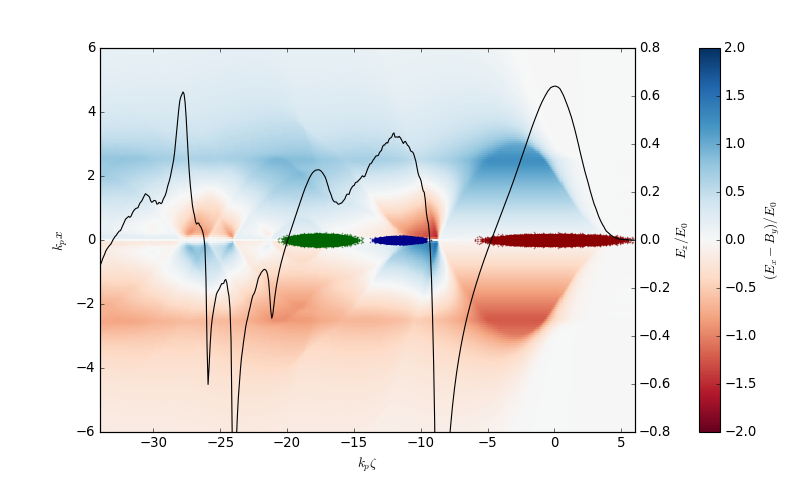

Drive Q*Ez_avg : -5.74E-06
Witness Q*Ez_avg : 1.88E-07
Recovery Q*Ez_avg : -1.37E-06


In [4]:
p = '/Users/max/HiPACE/recovery/diags/hdf5/recovery'
ip = '/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_drive.0000.txt'
prof = {'drive': [[0, 1.41]], 'witness': [[-11.57, .5], [-11.3, .2]], 'recovery': [[-17.5, 0.705]]}
# prof = None
d, w, r = recovery(path = p, profile = prof, insitu_path = ip, plot = True)
print(f'Drive Q*Ez_avg : {d:.2E}\nWitness Q*Ez_avg : {w:.2E}\nRecovery Q*Ez_avg : {r:.2E}')

In [15]:
i = 0

Ez, info = ts.get_field(field = 'Ez', iteration = i, coord = 'z')
ExmBy, _ = ts.get_field(field = 'ExmBy', iteration = i, coord = 'z')
EypBx, _ = ts.get_field(field = 'EypBx', iteration = i, coord = 'z')
By, _ = ts.get_field(field = 'By', iteration = i, coord = 'z')
Bx, _ = ts.get_field(field = 'Bx', iteration = i, coord = 'z')
Bz, _ = ts.get_field(field = 'Bz', iteration = i, coord = 'z')

In [44]:
Ex = np.add(ExmBy, By)
Ey = np.subtract(EypBx, Bx)

print(Ex**2 + Ey**2 + Ez**2)
print(Bx**2 + By**2 + Bz**2)

[[[2.56709522e-07 8.05487555e-07 1.22785994e-06 ... 1.93239513e-06
   1.43292691e-06 2.21143600e-07]
  [1.69503270e-06 4.40998570e-06 6.99100366e-06 ... 4.60531174e-06
   3.44215327e-06 5.86548232e-07]
  [2.86230226e-06 6.49843592e-06 9.02853213e-06 ... 6.29203715e-06
   4.75452020e-06 5.48036864e-07]
  ...
  [3.17375914e-06 7.07233057e-06 8.01765248e-06 ... 5.24678617e-06
   4.54677127e-06 5.79684840e-07]
  [2.12866008e-06 4.79630337e-06 7.05509527e-06 ... 4.27054960e-06
   2.84530102e-06 3.29114715e-07]
  [7.99605856e-07 1.81378986e-06 2.78172087e-06 ... 1.00305019e-06
   6.64183048e-07 8.22182278e-08]]

 [[2.95334576e-07 1.25795265e-06 1.88669795e-06 ... 1.25168743e-06
   1.48216910e-06 5.41594294e-07]
  [1.92988275e-06 5.09353443e-06 7.60408604e-06 ... 3.02221690e-06
   3.40216992e-06 1.09348310e-06]
  [3.24123721e-06 7.17834083e-06 9.82736913e-06 ... 3.27464093e-06
   3.44826068e-06 5.12929394e-07]
  ...
  [2.67505572e-06 7.16865190e-06 9.97485425e-06 ... 5.93600008e-06
   4.44030

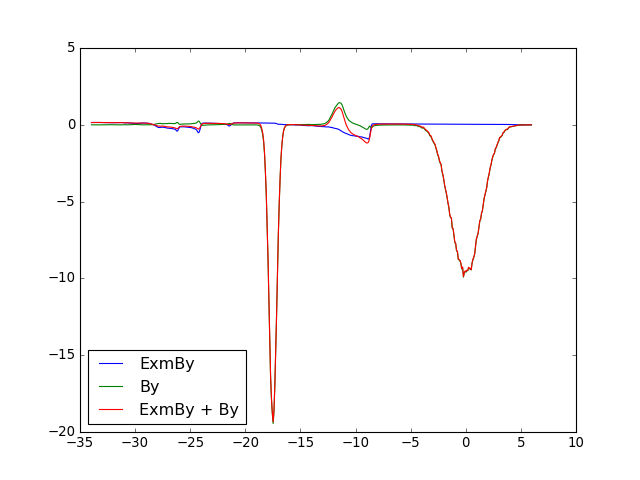

In [42]:
plt.figure()
plt.plot(info.z, np.transpose(ExmBy)[len(info.z)//2][len(info.z)//2])
plt.plot(info.z, np.transpose(By)[len(info.z)//2][len(info.z)//2])
plt.plot(info.z, np.transpose(ExmBy + By)[:, len(info.z)//2][len(info.z)//2])
plt.legend(['ExmBy', 'By', 'ExmBy + By'], loc = 'lower left')
plt.show()

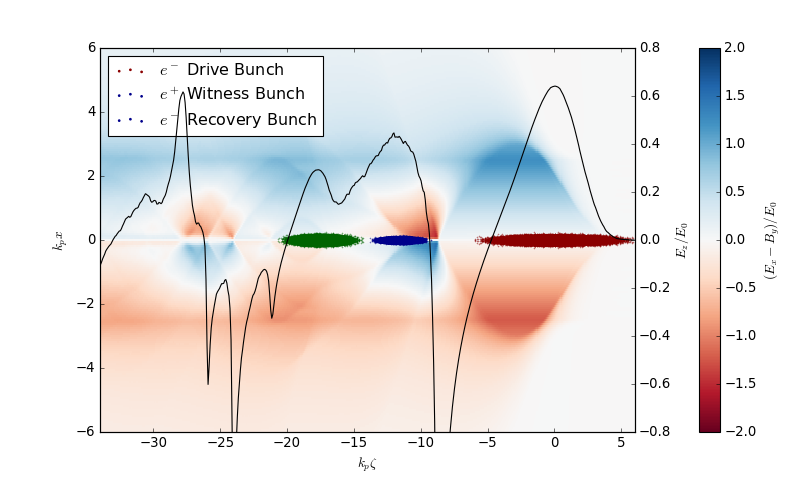

Energy Transfer Efficiency : 3.28 %


In [178]:
p = '/Users/max/HiPACE/recovery/diags/hdf5/recovery'
ip = '/Users/max/HiPACE/recovery/diags/insitu/recovery/reduced_drive.0000.txt'
prof = {'drive': [[0, 1.41]], 'witness': [[-11.57, .5], [-11.3, .2]]}
# prof = None
print(f'Energy Transfer Efficiency : {efficiency(path = p, profile = prof, insitu_path = ip, plot = True):.2f} %')

In [87]:
# print(ts.get_energy_spread(species = 'drive', iteration = 0))
print(ts.get_charge(species = 'drive', iteration = 0) * n0)
# print(ts.get_energy_spread(species = 'witness', iteration = 0))
# print(ts.get_charge(species = 'witness', iteration = 0))
# print(ts.get_energy_spread(species = 'witness2', iteration = 0))
# print(ts.get_charge(species = 'witness2', iteration = 0))

-44.41372239133694


In [20]:
i = 0

Qd = ts.get_charge(species = 'drive', iteration = 0)
Qw = ts.get_charge(species = 'witness', iteration = 0) + ts.get_charge(species = 'witness2', iteration = 0)
Qr = ts.get_charge(species = 'recovery', iteration = 0)

ExmBy, info_x = ts.get_field(field = 'ExmBy', iteration = i, coord = 'z')
Ez, info_x = ts.get_field(field = 'Ez', iteration = i, coord = 'z')
xd, zd, wd = ts.get_particle(species = 'drive', iteration = i, var_list = ['x', 'z', 'w'])
xw, zw, ww = ts.get_particle(species = 'witness', iteration = i, var_list = ['x', 'z', 'w'])
xw2, zw2, ww2 = ts.get_particle(species = 'witness2', iteration = i, var_list = ['x', 'z', 'w'])
xr, zr, wr = ts.get_particle(species = 'recovery', iteration = i, var_list = ['x', 'z', 'w'])
# ts.get_field?


In [187]:
ExmBy, info = ts.get_field(field = 'ExmBy', iteration = 0, coord = 'z')

In [192]:
print(np.transpose(ExmBy[:, len(info.x)//2]).shape)

(511, 512)


In [28]:
# plt.plot(info_x.x, get_Ez(info_x, Ez))
# np.transpose(Ez)[len(info_x.x)//2, :]
ez = get_Ez(Ez, info_x)
# ez.shape
plt.figure()
plt.plot(ez)
plt.close()
# Ez.shape
# plt.plot(Ez)
# ******* ez[i] gives the i-th slice of Ez!!!!! *********

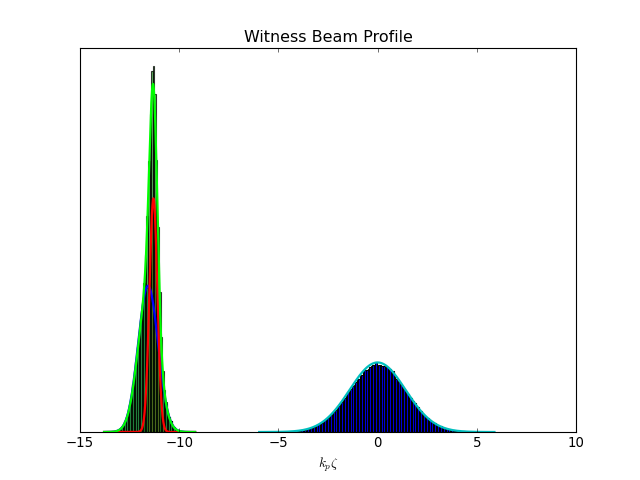

In [32]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure()

nw, binw, _ = plt.hist(zw, bins = len(get_Ez(Ez, info_x)[maskW]), color = 'tab:blue', density = False)
nw2, binw2, _ = plt.hist(zw2, bins = len(get_Ez(Ez, info_x)[maskW2]), color = 'red', density = False)
nW, binW, _  = plt.hist(np.concatenate((zw, zw2)), bins = (len(get_Ez(Ez, info_x)[maskW])), color = 'tab:green', alpha = .75, density = False)
nd, bind, _  = plt.hist(zd, bins = len(get_Ez(Ez, info_x)[maskD]), density = False)
# print(max(nw[0]))

# plt.plot(np.linspace(witnessMin, witnessMax, 500), gaussian(np.linspace(witnessMin, witnessMax, 500), -11.57, 0.5, 500000 / (np.sqrt(2 * np.pi) * 0.5)), 'b', linewidth = 2)
# plt.plot(np.linspace(witnessMin, witnessMax, 500), gaussian(np.linspace(witnessMin, witnessMax, 500), -11.3, 0.2, 5e4 / (np.sqrt(2 * np.pi) * 0.2)), 'r', linewidth = 2)
# plt.plot(np.linspace(witnessMin, witnessMax, 500), max(nW[0]) / (max(nw[0]) + max(nw2[0])) * (gaussian(np.linspace(witnessMin, witnessMax, 500), -11.57, 0.5, max(nw[0])) + gaussian(np.linspace(witnessMin, witnessMax, 500), -11.3, 0.2, max(nw2[0]))), 'lime', linewidth = 2)

plt.plot(np.linspace(driveMin, driveMax, 500), gaussianA(np.linspace(driveMin, driveMax, 500), 0, 1.41, max(nd)), 'c', linewidth = 2)
plt.plot(np.linspace(witnessMin, witnessMax, 500), gaussianA(np.linspace(witnessMin, witnessMax, 500), -11.57, 0.5, max(nw)), 'b', linewidth = 2)
plt.plot(np.linspace(witnessMin, witnessMax, 500), gaussianA(np.linspace(witnessMin, witnessMax, 500), -11.3, 0.2, max(nw2)), 'r', linewidth = 2)
plt.plot(np.linspace(witnessMin, witnessMax, 500), max(nW) / (max(nw) + max(nw2)) * (gaussianA(np.linspace(witnessMin, witnessMax, 500), -11.57, 0.5, max(nw)) + gaussianA(np.linspace(witnessMin, witnessMax, 500), -11.3, 0.2, max(nw2))), 'lime', linewidth = 2)

plt.ylim(0, max(np.concatenate((nW, nw, nd, nw2))) * 1.05)
plt.yticks([])
plt.title('Witness Beam Profile')
plt.xlabel('$k_p\zeta$')

# plt.plot(np.linspace(witnessMin, witnessMax, 100), , 'g', linewidth = 2)
# plt.hist(zw2, bins = len(get_Ez(Ez, info_x)[maskW2]))
plt.show()

In [33]:
driveMin, driveMax = min(zd), max(zd)
witnessMin, witnessMax = min(zw), max(zw) # note that 'witness2' is spatially contained in 'witness'
witnessMin2, witnessMax2 = min(zw2), max(zw2)

# driveWidth = driveMax - driveMin
# witnessWidth = witnessMax - witnessMin

maskD = np.logical_and(driveMin <= info_x.z, info_x.z <= driveMax)
maskW = np.logical_and(witnessMin <= info_x.z, info_x.z <= witnessMax)
maskW2 = np.logical_and(witnessMin2 <= info_x.z, info_x.z <= witnessMax2)

# bind[0], bind[-1] = min(zd) - 1e-6, max(zd) + 1e-6 # fix ends so that digitize works properly
# nd[np.digitize(zd, bind) - 1]

# EzDAvg = np.mean(get_Ez(Ez, info_x)[maskD])
# EzWAvg = np.mean(get_Ez(Ez, info_x)[maskW])

EzDAvg = np.average(get_Ez(Ez, info_x)[maskD], weights = nd)
EzWAvg = np.average(get_Ez(Ez, info_x)[maskW], weights = nW)

# EzDAvg = (get_Ez(Ez, info_x)[maskD] @ nd) / len(nd)
# EzWAvg = (get_Ez(Ez, info_x)[maskW] @ nW) / len(nW)

print(EzDAvg, EzWAvg)
# print(witnessMin, witnessMax, driveMin, driveMax)

0.5199016106969631 0.4136173050671308


In [532]:
print(Ez_raw.shape)

(512, 511, 511)


In [283]:
print(sum(nw) / (np.sqrt(2 * np.pi) * 0.5), max(nw))

598413.4206021491 47560.0


In [284]:
print(sum(nd) / (np.sqrt(2 * np.pi) * 1.41), max(nd))

282937.7875187466 22608.0


In [60]:
eta = - (Qw * EzWAvg) / (Qd * EzDAvg) * 1e2 # percent

# print(Qw, Qd, EzWAvg, EzDAvg)

print(eta)

3.2960283385754465


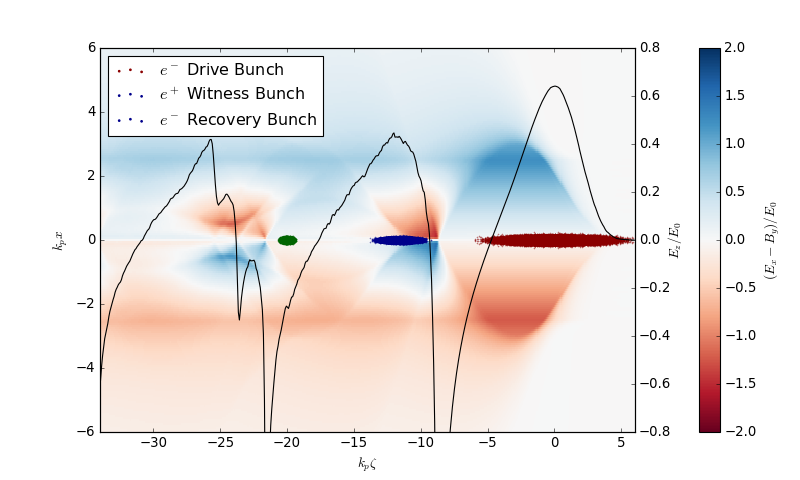

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))


im = ax.pcolormesh(info_x.z, info_x.x, np.transpose(ExmBy[:, len(info_x.x)//2]), cmap='RdBu', vmin=-2, vmax=2) 

plt.scatter(zd, xd, s = .02, color = 'darkred')
plt.scatter(zw, xw, s = .02, color = 'darkblue')
plt.scatter(zw2, xw2, s = .02, color = 'darkblue', label = '__nolegend__')
plt.scatter(zr, xr, s = .02, color = 'darkgreen')
plt.legend(['$e^-$ Drive Bunch', '$e^+$ Witness Bunch', '$e^-$ Recovery Bunch'], loc = 'upper left', markerscale = 10)

# plt.vlines([driveMin, driveMax], -6, 6, color = 'darkred', linestyle = 'dashed')
# plt.vlines([witnessMin, witnessMax], -6, 6, color = 'darkblue', linestyle = 'dashed')

ax.set_xlim(-34, 6)
ax.set_ylim(-6, 6)
ax.set_ylabel('$k_px$')
ax.set_xlabel('$k_p\zeta$')

# plt.style.use()

# matplotlib.rc('axes', edgecolor='k')

# ax.tick_params(colors='k')
# ax.tick_params(axis='y', colors='k')
# ax.yaxis.label.set_color('k')
# ax.xaxis.label.set_color('k')

ax2 = ax.twinx()
ax2.plot(info_x.z, get_Ez(Ez, info_x), color = 'k')
# ax2.plot(info_x.z[maskD], get_Ez(Ez, info_x)[maskD], color = 'r')
# ax2.plot(info_x.z[maskW], get_Ez(Ez, info_x)[maskW], color = 'b')

# ax2.plot(info_x.z, np.transpose(Ez)[len(info_x.x)//2,:], color='black')
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad=-5) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size="4%", pad=.8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size="4%", pad=.8)
cax3.remove()

cb2 = plt.colorbar(im, cax=cax2)
cb2.set_label(r'$(E_x - B_y)/E_0 $')

In [149]:
u = Edensity(iteration = 0)

In [8]:
Ez_raw, info = ts.get_field(field = 'Ez', iteration = 0)

In [132]:
i = 0

rho, info = ts.get_field(field = 'rho', iteration = i, coord = 'z')
jz_beam, _ = ts.get_field(field = 'jz_beam', iteration = i, coord = 'z')

In [ ]:
plt.figure(figsize = (10, 6))

# plt.pcolormesh(info.z, info.x, np.transpose(jz_beam[:, len(info.x)//2]), cmap = 'RdBu', vmin = -1e2, vmax = 1e2)
img = plt.pcolormesh(info.z, info.x, np.transpose(rho[:, len(info.x)//2]), cmap = 'RdGy', vmin = -8, vmax = 8) # y-slice
# img = plt.pcolormesh(info.z, info.y, np.transpose(u[:, :, len(info.x)//2]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # x-slice
# img = plt.pcolormesh(info.x, info.y, np.transpose(u[len(info.x)//2, :, :]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # z-slice

plt.xlim(-34, 6)
plt.ylim(-16, 16)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(img)
cb2.set_label(r'$\rho/(en_0$)')

plt.show()

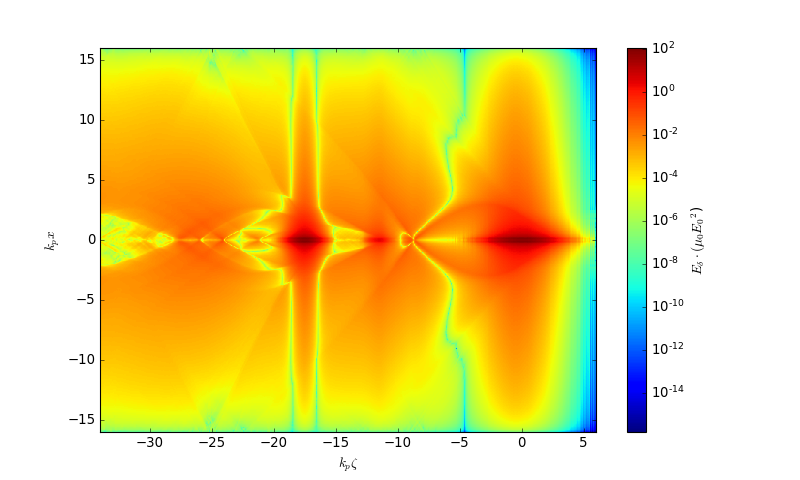

In [150]:
plt.figure(figsize = (10, 6))
img = plt.pcolormesh(info.z, info.x, np.transpose(u[:, len(info.x)//2]), cmap = 'jet', norm=matplotlib.colors.LogNorm()) #, vmin = 0, vmax = 2.5e4) # y-slice
# img = plt.pcolormesh(info.z, info.y, np.transpose(u[:, :, len(info.x)//2]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # x-slice
# img = plt.pcolormesh(info.x, info.y, np.transpose(u[len(info.x)//2, :, :]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # z-slice

plt.xlim(-34, 6)
plt.ylim(-16, 16)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(img)
cb2.set_label(r'$E_\delta\cdot(\mu_0{E_0}^2$)')

plt.show()

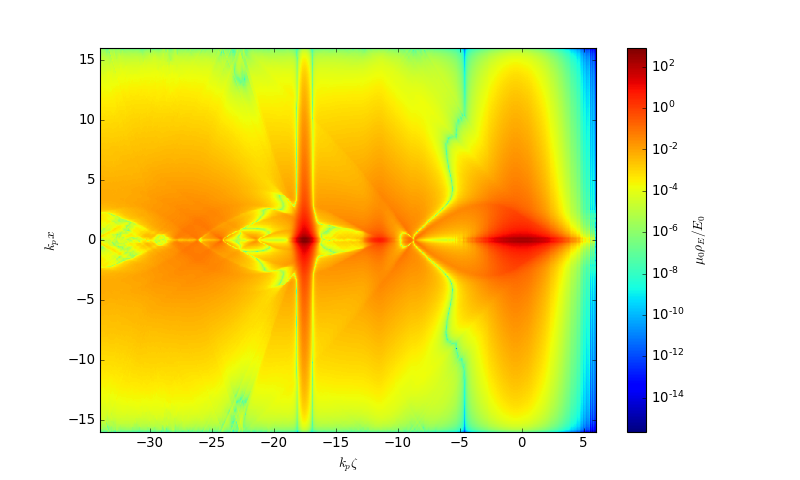

In [16]:
plt.figure(figsize = (10, 6))
img = plt.pcolormesh(info.z, info.x, np.transpose(u[:, len(info.x)//2]), cmap = 'jet', norm=matplotlib.colors.LogNorm()) #, vmin = 0, vmax = 2.5e4) # y-slice
# img = plt.pcolormesh(info.z, info.y, np.transpose(u[:, :, len(info.x)//2]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # x-slice
# img = plt.pcolormesh(info.x, info.y, np.transpose(u[len(info.x)//2, :, :]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # z-slice

plt.xlim(-34, 6)
plt.ylim(-16, 16)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(img)
cb2.set_label(r'$\mu_0\rho_E/E_0$')

plt.show()

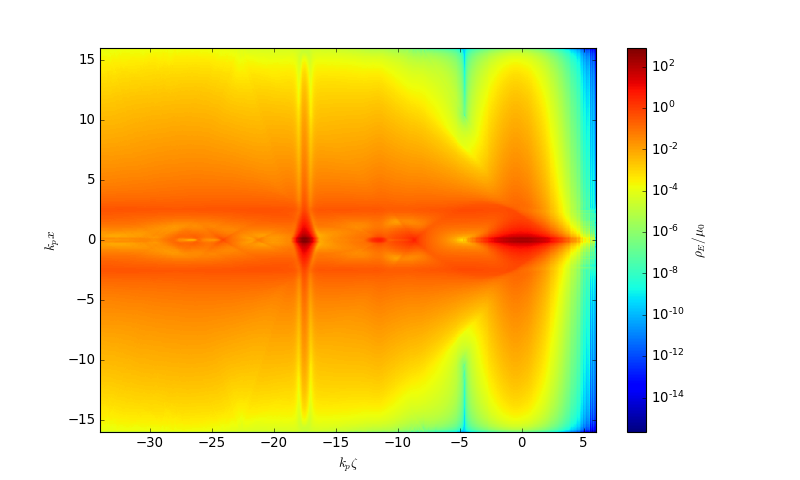

In [ ]:
plt.figure(figsize = (10, 6))
img = plt.pcolormesh(info.z, info.x, np.transpose(u[:, len(info.x)//2]), cmap = 'jet', norm=matplotlib.colors.LogNorm()) #, vmin = 0, vmax = 2.5e4) # y-slice
# img = plt.pcolormesh(info.z, info.y, np.transpose(u[:, :, len(info.x)//2]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # x-slice
# img = plt.pcolormesh(info.x, info.y, np.transpose(u[len(info.x)//2, :, :]), cmap = 'Reds', vmin = 0, vmax = 2.5e4) # z-slice

plt.xlim(-34, 6)
plt.ylim(-16, 16)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(img)
cb2.set_label(r'$\rho_E/\mu_0$')

plt.show()

In [36]:
maskR = (info.z > -22) & (info.z < -18)
recoveryPlacement = np.argmin(ez[maskR])
print(info.z[maskR][recoveryPlacement])

-21.5390625


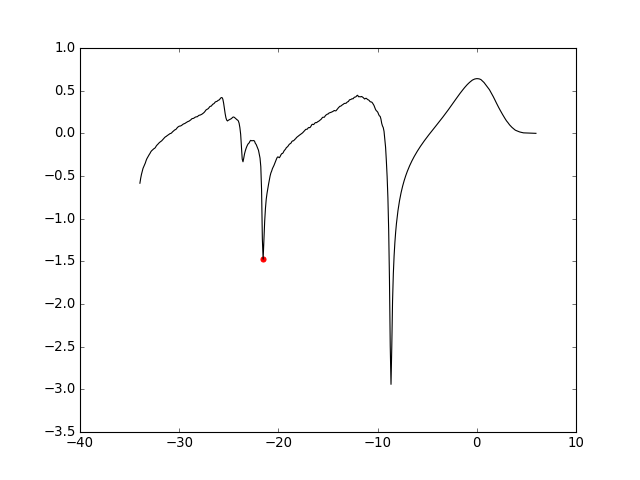

In [37]:
plt.figure()
plt.plot(info.z, ez, color = 'k')
plt.scatter(info.z[maskR][recoveryPlacement], ez[maskR][recoveryPlacement], color = 'r')
plt.show()